In [1]:
import numpy as np

# Two versions of the chirp function are provided.  Depending on need
# it is more convenient sometimes to describe a chirp in terms of low
# and high frequencies, along with time length of chirp.  Other times
# it is convenient to describe chirp in terms of number of center frequency,
# bandwidth, repetition rate, and sample rate.
#
# The frequency based version generates the chirp waveform.  The center
# frequency described version simply has its parameters used to generate
# new parameters to call the first version.
#
# See http://en.wikipedia.org/wiki/Chirp for details on derivation.
#
# Mike Markowski, mike.ab3ap@gmail.com
# Mar 4, 2015


# chirp
#
# Generate a frequency sweep from low to high over time.
# Waveform description is based on number of samples.
#
# Inputs
#  fs_Hz: float, sample rate of chirp signal.
#  rep_Hz: float, repetitions per second of chirp.
#  f0_Hz: float, start (lower) frequency in Hz of chirp.
#  f1_Hz: float, stop (upper) frequency in Hz of chirp.
#  phase_rad: float, phase in radians at waveform start, default is 0.
#
# Output
#  Time domain chirp waveform of length numnSamples.

def chirp(fs_Hz, rep_Hz, f0_Hz, f1_Hz, phase_rad=0):
    
    T_s = 1 / rep_Hz # Period of chirp in seconds.
    c = (f1_Hz - f0_Hz) / T_s # Chirp rate in Hz/s.
    n = int(fs_Hz / rep_Hz) # Samples per repetition.
    t_s = np.linspace(0, T_s, n) # Chirp sample times.

    # Phase, phi_Hz, is integral of frequency, f(t) = ct + f0.
    phi_Hz = (c * t_s**2) / 2 + (f0_Hz * t_s) # Instantaneous phase.
    phi_rad = 2 * np.pi * phi_Hz # Convert to radians.
    phi_rad += phase_rad # Offset by user-specified initial phase.
    # return np.exp(1j * phi_rad) # Complex I/Q.
    chirp={ "chirp":np.sin(phi_rad), # Just real, or I, component.
            "end_phase": phi_rad[-1],
            "timestamps":t_s

            } 
    return chirp

# chirpCtr
#
# Convenience function to create a chirp based on center frequency and
# bandwidth.  It simply calculates start and stop freuqncies of chirp and
# calls the chirp creation function.
#
# Inputs
#  fs_Hz: sample rate in Hz of chirp waveform.
#  fc_Hz: float, center frequency in Hz of the chirp.
#  rep_Hz: integer, number of full chirps per second.
#  bw_Hz: float, bandwidth of chirp.
#  phase_rad: phase in radians at waveform start, default is 0.
#
# Output
#  Time domain chirp waveform.

def chirpCtr(fs_Hz, fc_Hz, rep_Hz, bw_Hz, phase_rad=0):
    f0_Hz = fc_Hz - bw_Hz / 2.
    f1_Hz = fc_Hz + bw_Hz / 2.
    return chirp(fs_Hz, rep_Hz, f0_Hz, f1_Hz, phase_rad) 


{'chirp': array([0.        , 0.00502657, 0.01005293, ..., 0.99999999, 1.        ,
       1.        ]), 'end_phase': 158.65042900628455, 'timestamps': array([0.0000000e+00, 8.0001280e-06, 1.6000256e-05, ..., 4.9998400e-01,
       4.9999200e-01, 5.0000000e-01])}


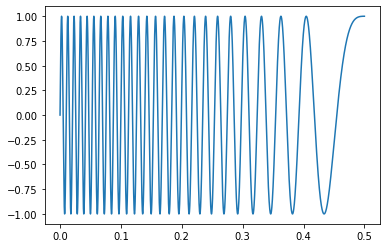

In [18]:
import numpy as np
import matplotlib.pyplot as plt
signal=chirp(125000, 2, 100, 1, phase_rad=0)
print (signal)
plt.plot(signal["timestamps"],signal["chirp"])

Subwave:2 dur:0.3333333333333333
[0.         0.00100552 0.00201137 ... 0.88070918 0.87346669 0.8660254 ]
Subwave:2 dur:0.3333333333333333
[ 0.8660254   0.86552221  0.86501796 ... -0.85055393 -0.85838718
 -0.8660254 ]
Subwave:2 dur:0.3333333333333333
[-8.66025404e-01 -8.66527725e-01 -8.67029339e-01 ... -3.01552482e-02
 -1.50795075e-02 -1.52875535e-13]
[ 0.00000000e+00  1.00551860e-03  2.01137399e-03 ... -3.01552482e-02
 -1.50795075e-02 -1.52875535e-13]
[ 0.00000000e+00  1.00551860e-03  2.01137399e-03 ... -1.50795075e-02
 -1.52875535e-13  0.00000000e+00]


C:\Users\robin\AppData\Local\Temp/ipykernel_8980/1427897135.py:46: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if timestamps == []:


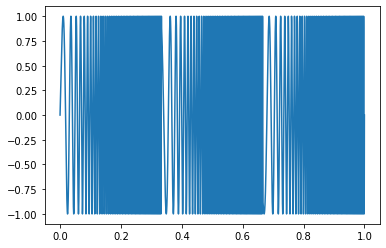

In [93]:
import numpy as np
import matplotlib.pyplot as plt
#preparing waveform
waveform=[]
pattern=[+1,0,+1,0,+1,0]
prev_value = 0
length = 0
for i in pattern:
    if i == 0 and prev_value == 0 and length == 0:
        print ('invalid pattern') 
        break
    elif i==0:
        length += np.sign(length)
    elif  i==-1:
        if length != 0:
            waveform.append(length)
        length = -1
    elif  i==1:
        if length != 0:
            waveform.append(length)
        length = 1
waveform.append(length)        

#Generat the chirpsignal
chirp_signal=[]
fs=125000
t_chirp= 1
f_min = 20 #to generate a signal with constant frequency, set f_min and f_max the same value
f_max = 300
phase = 0
gen_chirp={}
sub_chirp=[]
timestamps =[]
for i in waveform:
    print ('Subwave:'+ str(i) +' dur:'+ str(abs(i)/(len(pattern)*t_chirp)))
    if np.sign(i)==1:
        gen_chirp = chirp(fs,1/(abs(i)/(len(pattern)*t_chirp)),f_min,f_max,phase)
        sub_chirp=gen_chirp["chirp"]
        print(sub_chirp)
    elif np.sign(i)==-1:
        gen_chirp = chirp(fs,1/(abs(i)/(len(pattern)*t_chirp)),f_max,f_min,phase)
        print(gen_chirp)
        sub_chirp=gen_chirp["chirp"]
    chirp_signal=np.append(chirp_signal,sub_chirp)
    phase = gen_chirp["end_phase"]
    if timestamps == []:
        timestamps= gen_chirp["timestamps"]
    else:
        timestamps=np.append(timestamps,gen_chirp["timestamps"] + timestamps[-1])
print (chirp_signal)
chirp_signal=np.append(chirp_signal,[0])
timestamps= np.append(timestamps, 1/fs + timestamps[-1])
print (chirp_signal)
plt.plot(timestamps,chirp_signal)